In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import networkx as nx

In [2]:
# クラメールのV計算用関数
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

# カテゴリ変数同士のクラメールのVを計算
def calculate_cramers_v_matrix(df):
    cols = df.columns
    n_cols = len(cols)
    cramers_v_matrix = np.zeros((n_cols, n_cols))

    for i in range(n_cols):
        for j in range(n_cols):
            if i == j:
                cramers_v_matrix[i, j] = 1.0
            else:
                confusion_matrix = pd.crosstab(df.iloc[:, i], df.iloc[:, j])
                cramers_v_matrix[i, j] = cramers_v(confusion_matrix)
    
    return pd.DataFrame(cramers_v_matrix, index=cols, columns=cols)

# クラメールのVがしきい値を超えたカテゴリペアを出力
def find_high_cramers_v_pairs(cramers_v_matrix, threshold):
    high_corr_pairs = []
    for i in range(cramers_v_matrix.shape[0]):
        for j in range(i + 1, cramers_v_matrix.shape[1]):  # 対角線の上半分のみを見る
            if cramers_v_matrix.iloc[i, j] > threshold:
                high_corr_pairs.append((cramers_v_matrix.index[i], cramers_v_matrix.columns[j], cramers_v_matrix.iloc[i, j]))
    return high_corr_pairs

# 次数が高いノードから取り除く
def remove_high_degree_nodes(G):
    removed_nodes = []  # 取り除かれたノードを保存するリスト
    
    while G.number_of_edges() > 0:
        # 各ノードの次数を計算し、次数が最も高いノードを選ぶ
        highest_degree_node = max(G.degree, key=lambda x: x[1])[0]
        print(f"Removing node: {highest_degree_node} with degree {G.degree[highest_degree_node]}")
        
        # ノードをリストに保存
        removed_nodes.append(highest_degree_node)
        
        # ノードをグラフから削除
        G.remove_node(highest_degree_node)
        
        # グラフを描画
        # plt.figure(figsize=(9, 6))
        # pos = nx.spring_layout(G, k=0.5)
        # nx.draw_networkx_nodes(G, pos, node_size=300, alpha=0.5)
        # nx.draw_networkx_edges(G, pos, width=[d['weight']*10 for (u, v, d) in G.edges(data=True)], alpha=0.7)
        # nx.draw_networkx_labels(G, pos, font_size=12)
        # plt.title(f"Cramér's V Graph")
        # plt.show()
        # plt.clf()

        # print(f"Remaining edges: {G.number_of_edges()}")
    
    return removed_nodes

データのパスは適宜変更してください

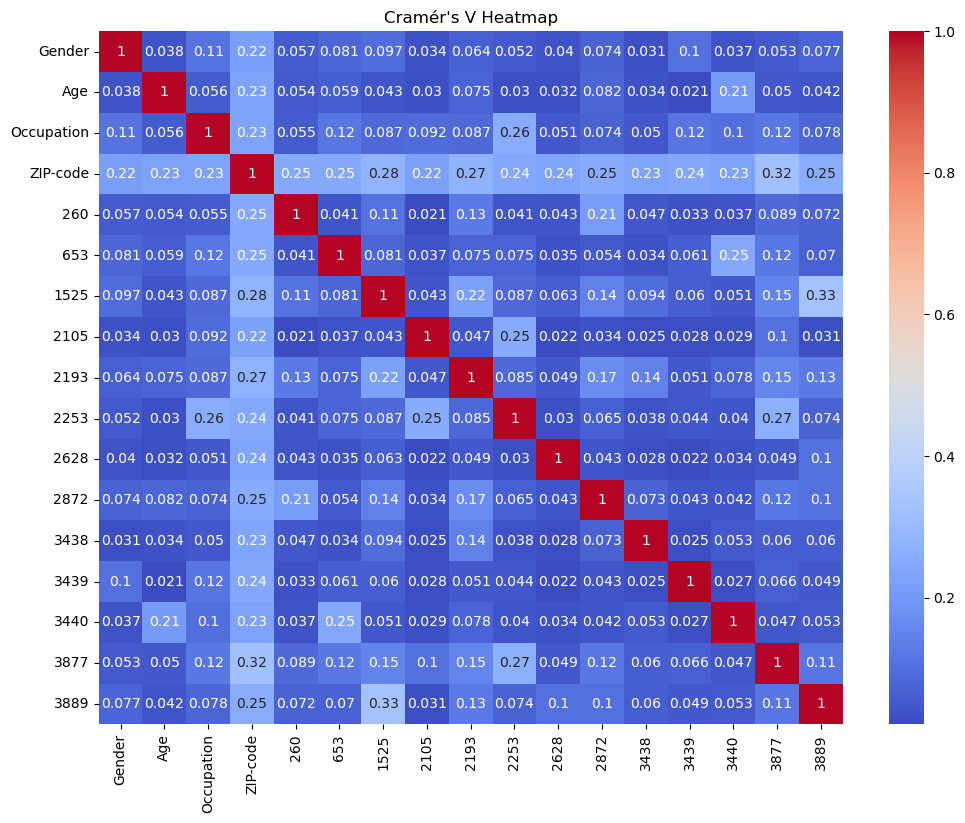

<Figure size 640x480 with 0 Axes>

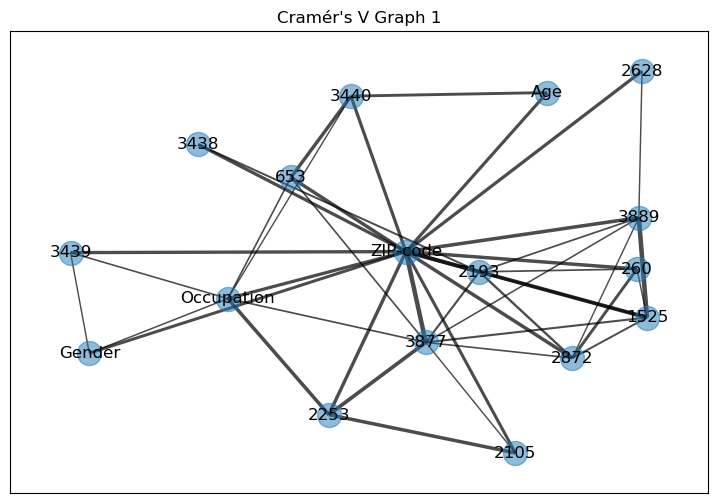

Removing node: ZIP-code with degree 16
Removing node: 3877 with degree 8
Removing node: Occupation with degree 5
Removing node: 2193 with degree 5
Removing node: 1525 with degree 3
Removing node: 3440 with degree 2
Removing node: 2872 with degree 2
Removing node: Gender with degree 1
Removing node: 2253 with degree 1
Removing node: 2628 with degree 1
Nodes removed in order: ['ZIP-code', '3877', 'Occupation', '2193', '1525', '3440', '2872', 'Gender', '2253', '2628']


<Figure size 640x480 with 0 Axes>

In [3]:
# DataFrameを指定
df = pd.read_csv('../../data/Bi58/Bi58_0.csv')

# クラメールのV行列を計算
cramers_v_matrix = calculate_cramers_v_matrix(df)

# しきい値を設定
threshold = 0.1

# しきい値を超えたペアを出力
high_corr_pairs = find_high_cramers_v_pairs(cramers_v_matrix, threshold)

# 結果を表示
# print("Cramér's Vがしきい値を超えたカテゴリペア:")
G = nx.Graph()
for pair in high_corr_pairs:
    G.add_edge(pair[0], pair[1], weight=pair[2])
    # if pair[0] != "ZIP-code" and pair[1] != "ZIP-code":
    #     print(f"{pair[0]} と {pair[1]}: Cramér's V = {pair[2]:.3f}")
    #     G.add_edge(pair[0], pair[1], weight=pair[2])

# ヒートマップを描画
plt.figure(figsize=(12, 9))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title("Cramér's V Heatmap")
plt.show()
plt.clf()

# グラフの描画
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
for i, subG in enumerate(S):
    plt.figure(figsize=(9, 6))
    pos = nx.spring_layout(subG, k=0.5)
    nx.draw_networkx_nodes(subG, pos, node_size=300, alpha=0.5)
    nx.draw_networkx_edges(subG, pos, width=[d['weight']*10 for (u, v, d) in subG.edges(data=True)], alpha=0.7)
    nx.draw_networkx_labels(subG, pos, font_size=12)
    plt.title(f"Cramér's V Graph {i+1}")
    plt.show()
    plt.clf()

# 高次数のノードから順に削除
removed_nodes = remove_high_degree_nodes(G)
print(f"Nodes removed in order: {removed_nodes}")

In [4]:
df = pd.read_csv('../../data/Bi58/Bi58_1.csv')

# クラメールのV行列を計算
cramers_v_matrix = calculate_cramers_v_matrix(df)

# しきい値を設定
threshold = 0.2

# しきい値を超えたペアを出力
high_corr_pairs = find_high_cramers_v_pairs(cramers_v_matrix, threshold)

# グラフを作成
G = nx.Graph()
for pair in high_corr_pairs:
    G.add_edge(pair[0], pair[1], weight=pair[2])

# 高次数のノードから順に削除
removed_nodes = remove_high_degree_nodes(G)
print(f"Nodes removed in order: {removed_nodes}")

Removing node: ZIP-code with degree 26
Removing node: 1967 with degree 6
Removing node: 1525 with degree 4
Removing node: 2628 with degree 4
Removing node: 2043 with degree 3
Removing node: 2143 with degree 3
Removing node: 2399 with degree 2
Removing node: Gender with degree 1
Removing node: Occupation with degree 1
Removing node: 1750 with degree 1
Removing node: 2093 with degree 1
Removing node: 2193 with degree 1
Removing node: 2968 with degree 1
Nodes removed in order: ['ZIP-code', '1967', '1525', '2628', '2043', '2143', '2399', 'Gender', 'Occupation', '1750', '2093', '2193', '2968']


In [5]:
df = pd.read_csv('../../data/Bi58/Bi58_2.csv')

# クラメールのV行列を計算
cramers_v_matrix = calculate_cramers_v_matrix(df)

# しきい値を設定
threshold = 0.1

# しきい値を超えたペアを出力
high_corr_pairs = find_high_cramers_v_pairs(cramers_v_matrix, threshold)

# グラフを作成
G = nx.Graph()
for pair in high_corr_pairs:
    G.add_edge(pair[0], pair[1], weight=pair[2])

# 高次数のノードから順に削除
removed_nodes = remove_high_degree_nodes(G)
print(f"Nodes removed in order: {removed_nodes}")

Removing node: ZIP-code with degree 8
Removing node: 2087 with degree 3
Removing node: Occupation with degree 2
Nodes removed in order: ['ZIP-code', '2087', 'Occupation']


In [6]:
df = pd.read_csv('../../data/Bi58/Bi58_3.csv')

# クラメールのV行列を計算
cramers_v_matrix = calculate_cramers_v_matrix(df)

# しきい値を設定
threshold = 0.2

# しきい値を超えたペアを出力
high_corr_pairs = find_high_cramers_v_pairs(cramers_v_matrix, threshold)

# グラフを作成
G = nx.Graph()
for pair in high_corr_pairs:
    G.add_edge(pair[0], pair[1], weight=pair[2])

# 高次数のノードから順に削除
removed_nodes = remove_high_degree_nodes(G)
print(f"Nodes removed in order: {removed_nodes}")

Removing node: ZIP-code with degree 27
Removing node: 1073 with degree 5
Removing node: Gender with degree 3
Removing node: 1967 with degree 3
Removing node: 2087 with degree 3
Removing node: 56 with degree 1
Removing node: 2017 with degree 1
Removing node: Age with degree 1
Removing node: 1525 with degree 1
Removing node: 1920 with degree 1
Nodes removed in order: ['ZIP-code', '1073', 'Gender', '1967', '2087', '56', '2017', 'Age', '1525', '1920']


In [7]:
df = pd.read_csv('../../data/Bi58/Bi58_4.csv')

# クラメールのV行列を計算
cramers_v_matrix = calculate_cramers_v_matrix(df)

# しきい値を設定
threshold = 0.1

# しきい値を超えたペアを出力
high_corr_pairs = find_high_cramers_v_pairs(cramers_v_matrix, threshold)

# グラフを作成
G = nx.Graph()
for pair in high_corr_pairs:
    G.add_edge(pair[0], pair[1], weight=pair[2])

# 高次数のノードから順に削除
removed_nodes = remove_high_degree_nodes(G)
print(f"Nodes removed in order: {removed_nodes}")

Removing node: ZIP-code with degree 14
Removing node: Occupation with degree 5
Removing node: Gender with degree 3
Removing node: 3466 with degree 2
Nodes removed in order: ['ZIP-code', 'Occupation', 'Gender', '3466']


In [8]:
df = pd.read_csv('../../data/Bi58/Bi58_5.csv')

# クラメールのV行列を計算
cramers_v_matrix = calculate_cramers_v_matrix(df)

# しきい値を設定
threshold = 0.1

# しきい値を超えたペアを出力
high_corr_pairs = find_high_cramers_v_pairs(cramers_v_matrix, threshold)

# グラフを作成
G = nx.Graph()
for pair in high_corr_pairs:
    G.add_edge(pair[0], pair[1], weight=pair[2])

# 高次数のノードから順に削除
removed_nodes = remove_high_degree_nodes(G)
print(f"Nodes removed in order: {removed_nodes}")

Removing node: ZIP-code with degree 10
Removing node: Occupation with degree 4
Removing node: 1654 with degree 2
Removing node: 2086 with degree 1
Nodes removed in order: ['ZIP-code', 'Occupation', '1654', '2086']


In [9]:
df = pd.read_csv('../../data/Bi58/Bi58_6.csv')

# クラメールのV行列を計算
cramers_v_matrix = calculate_cramers_v_matrix(df)

# しきい値を設定
threshold = 0.1

# しきい値を超えたペアを出力
high_corr_pairs = find_high_cramers_v_pairs(cramers_v_matrix, threshold)

# グラフを作成
G = nx.Graph()
for pair in high_corr_pairs:
    G.add_edge(pair[0], pair[1], weight=pair[2])

# 高次数のノードから順に削除
removed_nodes = remove_high_degree_nodes(G)
print(f"Nodes removed in order: {removed_nodes}")

Removing node: ZIP-code with degree 8
Removing node: 2143 with degree 4
Removing node: Gender with degree 1
Removing node: 2872 with degree 1
Nodes removed in order: ['ZIP-code', '2143', 'Gender', '2872']


In [10]:
df = pd.read_csv('../../data/Bi58/Bi58_7.csv')

# クラメールのV行列を計算
cramers_v_matrix = calculate_cramers_v_matrix(df)

# しきい値を設定
threshold = 0.1

# しきい値を超えたペアを出力
high_corr_pairs = find_high_cramers_v_pairs(cramers_v_matrix, threshold)

# グラフを作成
G = nx.Graph()
for pair in high_corr_pairs:
    G.add_edge(pair[0], pair[1], weight=pair[2])

# 高次数のノードから順に削除
removed_nodes = remove_high_degree_nodes(G)
print(f"Nodes removed in order: {removed_nodes}")

Removing node: ZIP-code with degree 11
Removing node: Occupation with degree 4
Removing node: 2093 with degree 3
Removing node: 1750 with degree 2
Removing node: Gender with degree 1
Removing node: 1097 with degree 1
Nodes removed in order: ['ZIP-code', 'Occupation', '2093', '1750', 'Gender', '1097']


In [11]:
df = pd.read_csv('../../data/Bi58/Bi58_8.csv')

# クラメールのV行列を計算
cramers_v_matrix = calculate_cramers_v_matrix(df)

# しきい値を設定
threshold = 0.1

# しきい値を超えたペアを出力
high_corr_pairs = find_high_cramers_v_pairs(cramers_v_matrix, threshold)

# グラフを作成
G = nx.Graph()
for pair in high_corr_pairs:
    G.add_edge(pair[0], pair[1], weight=pair[2])

# 高次数のノードから順に削除
removed_nodes = remove_high_degree_nodes(G)
print(f"Nodes removed in order: {removed_nodes}")

Removing node: ZIP-code with degree 7
Removing node: Gender with degree 2
Removing node: 1920 with degree 1
Nodes removed in order: ['ZIP-code', 'Gender', '1920']


In [12]:
df = pd.read_csv('../../data/Bi58/Bi58_9.csv')

# クラメールのV行列を計算
cramers_v_matrix = calculate_cramers_v_matrix(df)

# しきい値を設定
threshold = 0.1

# しきい値を超えたペアを出力
high_corr_pairs = find_high_cramers_v_pairs(cramers_v_matrix, threshold)

# グラフを作成
G = nx.Graph()
for pair in high_corr_pairs:
    G.add_edge(pair[0], pair[1], weight=pair[2])

# 高次数のノードから順に削除
removed_nodes = remove_high_degree_nodes(G)
print(f"Nodes removed in order: {removed_nodes}")

Removing node: ZIP-code with degree 13
Removing node: 1097 with degree 4
Removing node: 2193 with degree 3
Removing node: Gender with degree 2
Removing node: Occupation with degree 1
Nodes removed in order: ['ZIP-code', '1097', '2193', 'Gender', 'Occupation']
